## Get the SQL data 

In [51]:
import numpy as np
import pyodbc
from numpy import quantile, where, random

In [52]:
server = 'smarthealthdb.database.windows.net'
database = 'SmarthHealth_DB'
username = 'SmarthHealthDB'
password = '5rUBXEMSREBsRzZ'   
driver= '{ODBC Driver 17 for SQL Server}'

In [105]:
o2 = []
pasos = []
fcard = []
data = []
with pyodbc.connect('DRIVER='+driver+';SERVER=tcp:'+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password) as conn:
            with conn.cursor() as cursor:
                cursor.execute("SELECT * FROM Stats")
                row = cursor.fetchone()
                while row:
                    #print (str(row[1]) + " " + str(row[2]) + " " + str(row[3]) + " " + str(row[4]) + " " + str(row[5]))
                    o2.append(row[2])
                    pasos.append(row[3])
                    fcard.append(row[4])
                    data.append([row[2], row[3], row[4]])
                    row = cursor.fetchone()
                    
print(o2)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95.0, 95

In [106]:
df = pd.DataFrame(data, columns = ['o2','pasos','fcard'])

In [107]:
df.describe()

,o2,pasos,fcard
count,380.000000,380.000000,380.000000
mean,69.547368,48.665789,37.386842
std,41.994099,38.567166,25.712031
min,0.000000,0.000000,-4.000000
25%,0.000000,0.000000,17.000000
50%,95.000000,64.500000,38.500000
75%,95.000000,82.250000,55.000000
max,99.000000,100.000000,95.000000


#### Because we get the data from a prototype, we got a lot of 0, we replace them with the mean

In [108]:
condition  = (df['fcard'] <= 0 )
df.loc[condition, 'fcard'] = df['fcard'].mean()
condition  = (df['pasos'] <= 0 )
df.loc[condition, 'pasos'] = df['pasos'].mean()
condition  = (df['o2'] <= 0 )
df.loc[condition, 'o2'] = df['o2'].mean()

In [109]:
df.describe()

,o2,pasos,fcard
count,380.000000,380.000000,380.000000
mean,88.032327,62.240983,41.866863
std,11.486376,25.303428,21.700767
min,42.000000,1.000000,3.000000
25%,69.547368,48.665789,27.500000
50%,95.000000,64.500000,38.693421
75%,95.000000,82.250000,55.000000
max,99.000000,100.000000,95.000000


In [110]:
print(df['fcard'].head(10))

0    37.386842
1    37.386842
2    37.386842
3    37.386842
4    31.000000
5    31.000000
6    30.000000
7    30.000000
8    30.000000
9    30.000000
Name: fcard, dtype: float64


## Anomaly Detection with SVM

In [135]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [136]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.3)
print(svm)

OneClassSVM(gamma=0.001, nu=0.3)


In [137]:
fcard = df['fcard'].to_numpy()
fcard.resize((len(fcard), 1))
svm.fit(fcard)
pred = svm.predict(fcard)

In [138]:
anom_index = where(pred==-1)
values = fcard[anom_index]

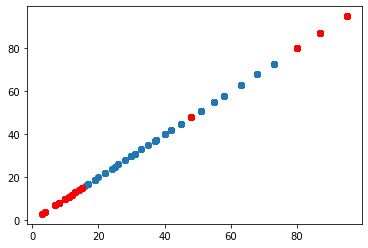

In [139]:
plt.scatter(fcard, fcard)
plt.scatter(values, values, color='r')
plt.show()

In [141]:
df['ano_fcad'] = pred

In [142]:
svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.003)
print(svm)

OneClassSVM(gamma=0.01, nu=0.003)


In [143]:
o2 = df['o2'].to_numpy()
o2.resize((len(o2), 1))
svm.fit(o2)
pred = svm.predict(o2)

In [144]:
anom_index = where(pred==-1)
values = o2[anom_index]

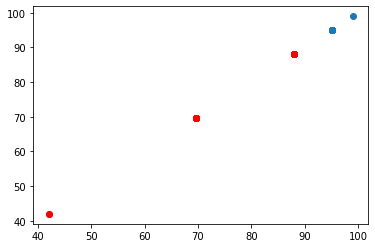

In [145]:
plt.scatter(o2, o2)
plt.scatter(values, values, color='r')
plt.show()

In [146]:
df['ano_o2'] = pred

In [148]:
df.to_csv("dataset.csv", index = True)